In [8]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

import numpyro
numpyro.set_host_device_count(10)

import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from scipy.stats import norm
import candel
from candel import SPEED_OF_LIGHT

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<unknown>:286: SyntaxWarning: invalid escape sequence '\m'
<unknown>:286: SyntaxWarning: invalid escape sequence '\m'


In [12]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config_shoes.toml"
data = candel.pvdata.load_SH0ES_from_config(config_path, )


# m = data["czcmb_cepheid_host"] < 2250
# data["e_czcmb_cepheid_host"][m] = 20_000

model = candel.model.SH0ESModel(config_path, data)

2025-06-16 17:27:13 warning: zero width found in the priors. Setting it to 1e-5.
2025-06-16 17:27:13 indices of zero width: [44]
2025-06-16 17:27:13 found zero-width prior at index 44. Setting it to 0.
2025-06-16 17:27:13 replacing prior of `M_B` with a delta function.
2025-06-16 17:27:13 Converting host RA/dec to Cartesian coordinates.
2025-06-16 17:27:13 set the following attributes: OH, logP, mag_cepheid, C_Cepheid, L_Cepheid, L_Cepheid_host_dist, L_SN_Cepheid_dist, L_SN_dist, C_SN_Cepheid, Y_SN_Cepheid, L_SN_Cepheid, mu_N4258_anchor, e_mu_N4258_anchor, e2_mu_N4258_anchor, mu_LMC_anchor, e_mu_LMC_anchor, e2_mu_LMC_anchor, Y_SN, C_SN, L_SN, Y_SN_HF, M_HST, e_M_HST, e2_M_HST, M_Gaia, e_M_Gaia, e2_M_Gaia, sigma_grnd, num_hosts, num_cepheids, num_flow_SN, czcmb_cepheid_host, e_czcmb_cepheid_host, e2_czcmb_cepheid_host, RA_host, dec_host, PV_covmat_cepheid_host, Cepheids_only, czcmb_SN_HF, e_czcmb_SN_HF, e2_czcmb_SN_HF, num_SN_HF, rhat_host
2025-06-16 17:27:13 use_SNe_HF set to False
202

In [13]:
samples = candel.run_SH0ES_inference(model, )

2025-06-16 17:27:14 running inference on devices: cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu), cpu(cpu)
2025-06-16 17:27:14 using NumPyro platform: CPU


  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]


                 mean       std    median      5.0%     95.0%     n_eff     r_hat
   A_covmat      2.08      0.64      2.00      1.03      3.01   2076.76      1.00
         H0     67.46      1.95     67.45     64.28     70.69   7311.61      1.00
        M_W     -5.92      0.02     -5.92     -5.95     -5.89   4951.24      1.00
        Z_W     -0.19      0.05     -0.19     -0.27     -0.09   3609.11      1.00
        b_W     -3.29      0.01     -3.29     -3.31     -3.26  11333.97      1.00
        dZP     -0.01      0.04     -0.01     -0.07      0.05   4169.22      1.00
     mu_LMC     18.48      0.03     18.48     18.44     18.52   6025.45      1.00
     mu_M31     24.40      0.07     24.40     24.29     24.52   8167.38      1.00
   mu_N4258     29.41      0.02     29.41     29.37     29.44   6617.61      1.00
 mu_host[0]     29.21      0.04     29.21     29.15     29.29   8461.74      1.00
 mu_host[1]     32.99      0.11     32.99     32.81     33.18  13804.72      1.00
 mu_host[2]    

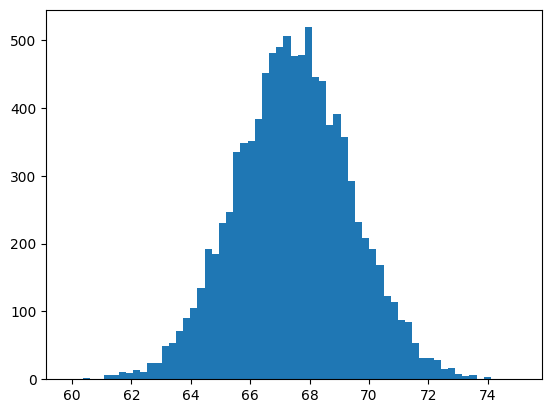

In [14]:
plt.figure()
plt.hist(samples["H0"], bins="auto")
plt.show()

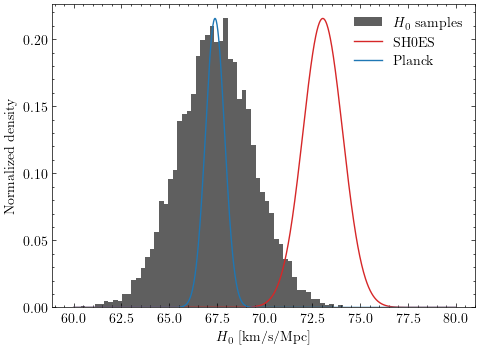

In [15]:
with plt.style.context("science"):
    fig, ax = plt.subplots(figsize=(5, 3.7),)

    # Histogram of H0 samples (normalize to max height = 1)
    counts, bins, _ = ax.hist(
        samples["H0"], bins="auto", density=True, alpha=0.9, color="0.3",
        label=r"$H_0$ samples"
    )
    max_density = counts.max()

    # Define a range for the Gaussians
    H0_vals = np.linspace(60, 80, 1000)

    # SH0ES (e.g. Riess+2021), normalized to match
    H0_SH0ES = 73.04
    H0_SH0ES_err = 1.04
    shoes_pdf = norm.pdf(H0_vals, loc=H0_SH0ES, scale=H0_SH0ES_err)
    shoes_pdf /= shoes_pdf.max()  # normalize peak to 1
    shoes_pdf *= max_density      # scale to match sample histogram
    ax.plot(H0_vals, shoes_pdf, color="tab:red", label="SH0ES")

    # Planck (e.g. Planck 2018), normalized to match
    H0_Planck = 67.4
    H0_Planck_err = 0.5
    planck_pdf = norm.pdf(H0_vals, loc=H0_Planck, scale=H0_Planck_err)
    planck_pdf /= planck_pdf.max()
    planck_pdf *= max_density
    ax.plot(H0_vals, planck_pdf, color="tab:blue", label="Planck")

    ax.set_xlabel(r"$H_0~[\mathrm{km/s/Mpc}]$")
    ax.set_ylabel("Normalized density")
    ax.legend()

    plt.tight_layout()
    fig.savefig("/Users/rstiskalek/Downloads/H0_samples.png", bbox_inches="tight")
    plt.show()

In [7]:
from scipy.stats import norm
import posterior_agreement

H0_SH0ES = samples["H0"]
H0_planck = norm(67.4, 0.5).rvs(50000)
# H0_planck = norm(73.04, 1.04).rvs(50000)



chains = (H0_SH0ES, H0_planck)
agreement_1d = posterior_agreement.compute_agreement(chains)

print("p-value %.3f, corresponding to %.4f sigmas"%(agreement_1d.PTE, agreement_1d.sigma))

p-value 0.001, corresponding to 3.3772 sigmas


In [50]:
from h5py import File

with File("/Users/rstiskalek/Projects/CANDEL/results/SH0ES/Cepheid_distances_no_redshift.hdf5", 'r') as f:
    samples = {key: f["samples"][key][...] for key in f["samples"].keys()}


mu = np.mean(samples["mu_host"], axis=0)
mu_cov = np.cov(samples["mu_host"], rowvar=False)
z_cmb = data["czcmb_cepheid_host"] / SPEED_OF_LIGHT

In [43]:
import jax.numpy as jnp
from jax import random

import numpyro
from numpyro import sample, plate, factor
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, init_to_sample
from numpyro.infer import Predictive

from candel import SPEED_OF_LIGHT, plot_corner

In [ ]:
def model(z_cmb, mu, mu_covmat,):
    H0 = sample("H0", dist.Uniform(10., 100.0))

    q0 = -0.55
    D = SPEED_OF_LIGHT * z_cmb / H0 * (1 - (1 + q0 / 2) * z_cmb)

    mu_pred = 5 * jnp.log10(D) + 25

    sample("mu", dist.MultivariateNormal(mu_pred, mu_covmat), obs=mu)

In [55]:
kernel = NUTS(model, init_strategy=init_to_sample())

# Set up and run MCMC
mcmc = MCMC(kernel, num_warmup=500, num_samples=50000, num_chains=1)
mcmc.run(random.PRNGKey(0),
         z_cmb=z_cmb,
         mu=mu,
         mu_covmat=mu_cov,)

mcmc.print_summary()
samples = mcmc.get_samples()

sample: 100%|██████████| 50500/50500 [00:05<00:00, 8933.96it/s, 1 steps of size 9.66e-01. acc. prob=0.94]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        H0     62.98      0.73     62.98     61.80     64.19  22228.98      1.00

Number of divergences: 0
